In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [6]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
X_train=X_train/255
X_test=X_test/255

In [9]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_train=X_train.reshape(-1,28,28,1)

In [12]:
X_train.shape

(60000, 28, 28, 1)

In [15]:
CNN=models.Sequential([
      layers.Conv2D(filters=25,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
      layers.MaxPooling2D((2,2)),

      layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
      layers.MaxPooling2D((2,2)),

      layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
      layers.MaxPooling2D((2,2)),

      layers.Flatten(),
      layers.Dense(64,activation='relu'),
      layers.Dense(10,activation='softmax')


                       ])

In [16]:
CNN.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
CNN.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1412 - accuracy: 0.9566
Epoch 2/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0454 - accuracy: 0.9862
Epoch 3/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0322 - accuracy: 0.9902
Epoch 4/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0247 - accuracy: 0.9920
Epoch 5/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0200 - accuracy: 0.9935
Epoch 6/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0164 - accuracy: 0.9949
Epoch 7/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0126 - accuracy: 0.9955
Epoch 8/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0105 - accuracy: 0.9967
Epoch 9/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0103 - accuracy: 0.9964
Epoch 10/10
1875/1875 [==============================] - 53s 28m

In [17]:
CNN.evaluate(X_test,Y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0385 - accuracy: 0.9900


[0.03850390017032623, 0.9900000095367432]

In [18]:
Y_predicted=CNN.predict(X_test)

313/313 [==============================] - 3s 8ms/step


In [19]:
Y_predicted.shape

(10000, 10)

In [21]:
Y_predicted[0]

array([1.6812127e-16, 1.3407775e-10, 1.4144790e-12, 2.2755010e-12,
       2.1832036e-09, 2.4070516e-15, 1.6286459e-19, 9.9999994e-01,
       1.0150332e-11, 2.4427040e-09], dtype=float32)

In [22]:
np.argmax(Y_predicted[0])

7

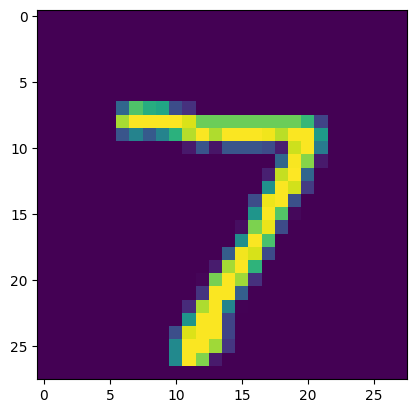

In [23]:
plt.imshow(X_test[0])